In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
# from customplotting.general import plot_xy, save_fig
from functions import *
from scipy import signal
# from Fit_functions_with_irf import *
from scipy.optimize import Bounds

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

In [42]:
names1=['Ref Air' , 'Ref Glass' , 'Br25/Al2O3/Me4 Air' , 'Br25/Al2O3/Me4 Glass' , 'Br25/Me4 Air' , 'Br25/Me4 Glass' , 'Br25/Me4 (Dynamic) Air' , 'Br25/Me4 (Dynamic) Glass' , 'Me4/Al2O3/Br25 Air' , 'Me4/Al2O3/Br25 Glass']

title = r'Br$_{25}$ with Al$_{2}$O$_{3}$/Me-4PACZ'

# skip = 1

data = pd.read_csv('3_27_23_Br25_Me4PACZ_Al2O3_data.csv', delimiter=',',index_col=False, skiprows = 0)


In [ ]:
print(data)
print(np.shape(data.values[:,1:]))


In [5]:
# print(np.shape(data)[])

In [9]:
### plotter = 3
# prange = np.argmin(data.values[:,plotter])
# plt.plot(data.values[:prange,0], data.values[:prange,plotter]/np.max(data.values[:prange,plotter]), label = 'A4', c= 'red')
# # plt.yscale('log')
# plt.show

size = np.int32(np.size(names1))

taus = np.zeros(size)
tau1 = np.zeros(size)
tau2 = np.zeros(size)
taua = np.zeros(size)
beta = np.zeros(size)
strfits = np.zeros(np.shape(data.values))
dubfits = np.zeros(np.shape(data.values))

peaktime = np.zeros(size)


prange = np.zeros(size)

scale = 1e9
for K in range (size):
    plotter = K +1

#     print(plotter)
    if (data.values[15624,plotter]==0):
        prange[K] = 15624
    elif (data.values[7812,plotter]==0):
        prange[K] = 7812
    elif (data.values[3906,plotter]==0):
        prange[K] = 3906
    else:
        print("ERROR")
        break
        
# print(prange)

for K in range (size):     
    plotter = K +1
#     print(np.int(prange[K]))
    peaktime[K] = np.argmax(data.values[:np.int32(prange[K]),plotter])
    time = data.values[np.int32(peaktime[K]):np.int32(prange[K]),0]
    stretchfit = stretch_exp_fit(data.values[np.int32(peaktime[K]):np.int32(prange[K]),plotter]/np.max(data.values[:np.int32(prange[K]),plotter]), time*1e-9, Tc = (0,1e4*1e-9), Beta = (0,1), A = (0,1),noise = (0,1e-3))
    doublefit = double_exp_fit(data.values[np.int32(peaktime[K]):np.int32(prange[K]),plotter]/np.max(data.values[:np.int32(prange[K]),plotter]), time*1e-9, tau1_bounds=(0,1000*1e-9), a1_bounds=(0,1), tau2_bounds=(0,10000*1e-9), a2_bounds=(0,1))

    taus[K] = stretchfit[3]*scale
    beta[K] = stretchfit[1]
    tau1[K] = doublefit[0]*scale
    tau2[K] = doublefit[2]*scale
    taua[K] = doublefit[4]*scale
    strfits[np.int32(peaktime[K]):np.int32(prange[K]),K+1] = stretchfit[4]
    dubfits[np.int32(peaktime[K]):np.int32(prange[K]),K+1] = doublefit[5]

#     print("Fitted" + f" {K+1}")
    print("a1 + a2 for sample" + f" {K+1} =" + f" {doublefit[1]+doublefit[3]}")


    
#     plt.plot(time, data.values[peaktime:prange,plotter]/np.max(data.values[:prange,plotter]), c= 'red', lw = 0.5)
#     plt.yscale('log')
#     plt.show()

a1 + a2 for sample 1 = 0.7560721022949951
a1 + a2 for sample 2 = 0.8213837172304819
a1 + a2 for sample 3 = 0.6736217861222074
a1 + a2 for sample 4 = 0.73700643553041
a1 + a2 for sample 5 = 0.7125710729290682
a1 + a2 for sample 6 = 0.851377924079795
a1 + a2 for sample 7 = 0.8047375298185147
a1 + a2 for sample 8 = 1.0234356248632097
a1 + a2 for sample 9 = 0.742363158017996
a1 + a2 for sample 10 = 0.7622580651002618


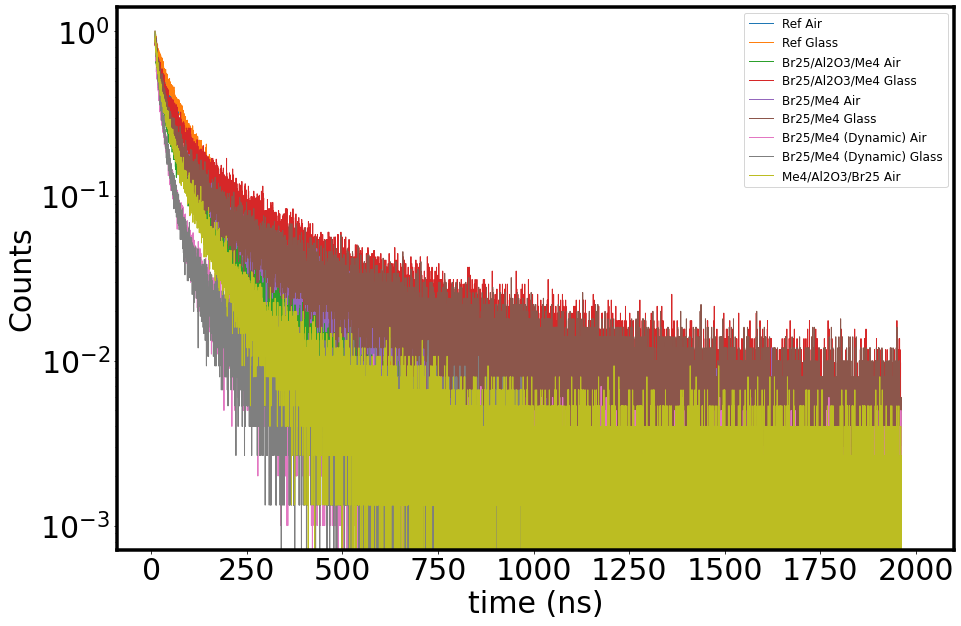

In [10]:
fig = plt.figure(figsize =(15, 10))
size2 = range(size-1)
# size2 = [0,1,2]



for K in size2:
    plotter = K+1
    time = data.values[np.int32(peaktime[K]):np.int32(prange[K]),0]

#     plt.plot(B1['XAxis'].values, B1['Counts'].values/np.max(B1['Counts'].values),'y', lw=1 , label='A1', alpha = 1)
    plt.plot(time, data.values[np.int32(peaktime[K]):np.int32(prange[K]),plotter]/np.max(data.values[:np.int32(prange[K]),plotter]), lw = 1,label = names1[K])
plt.yscale('log')
    
fs = 30


plt.xlabel('time (ns)',{'fontsize': fs})
plt.ylabel('Counts',{'fontsize': fs})
plt.legend(fontsize = "large",markerscale = 5)
plt.show()


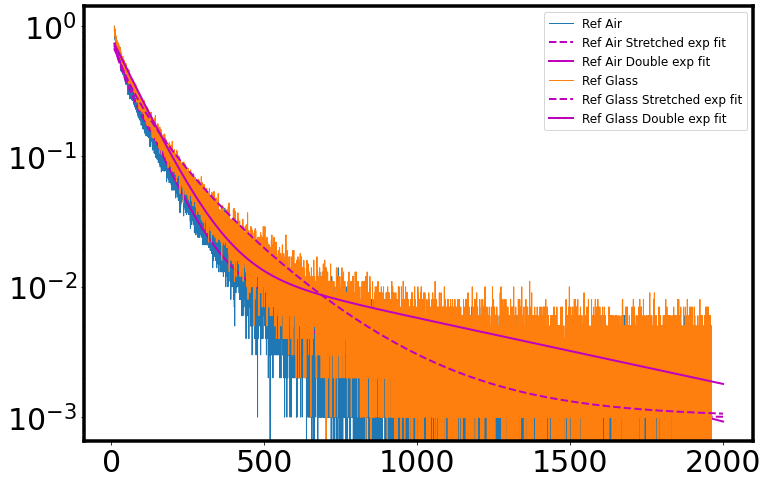

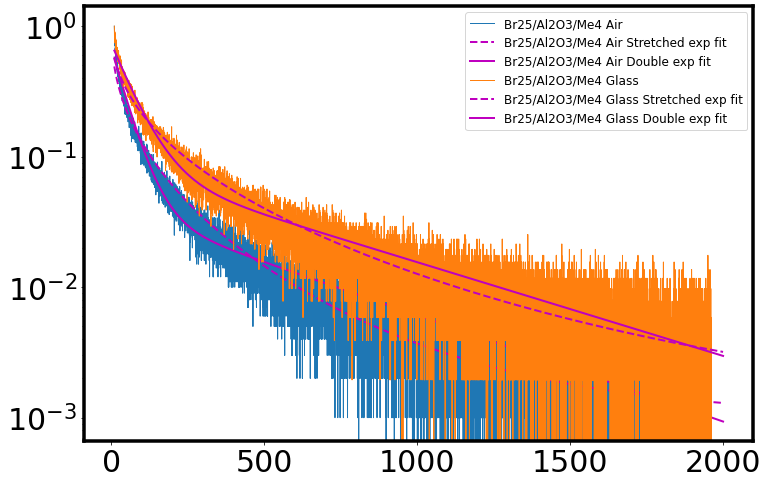

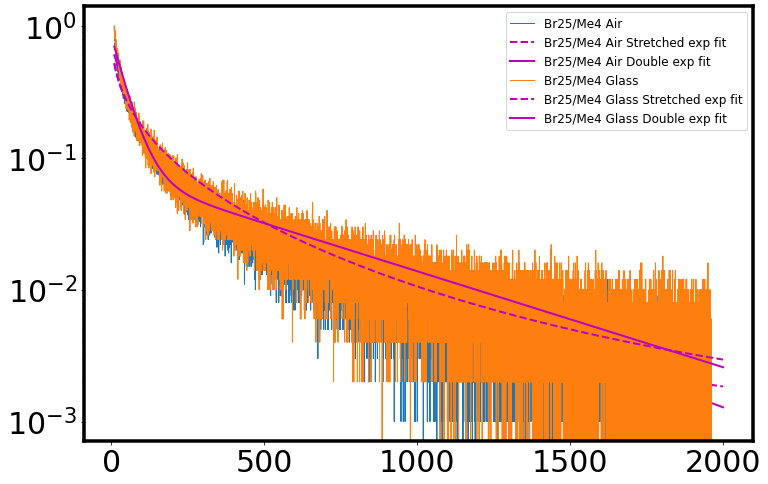

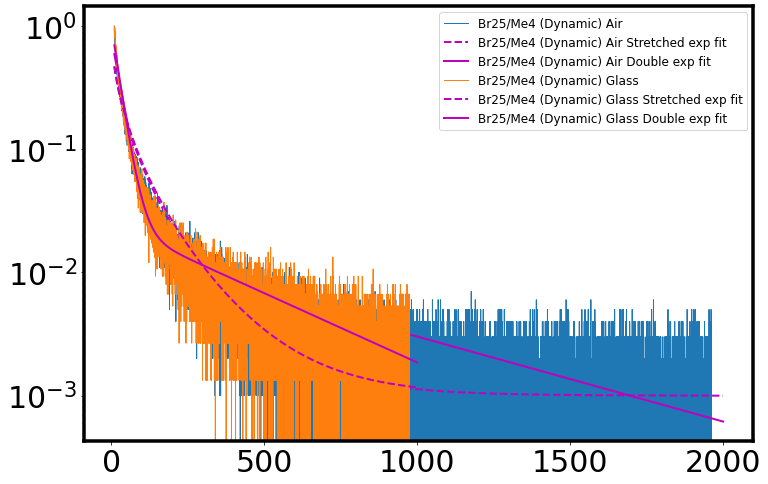

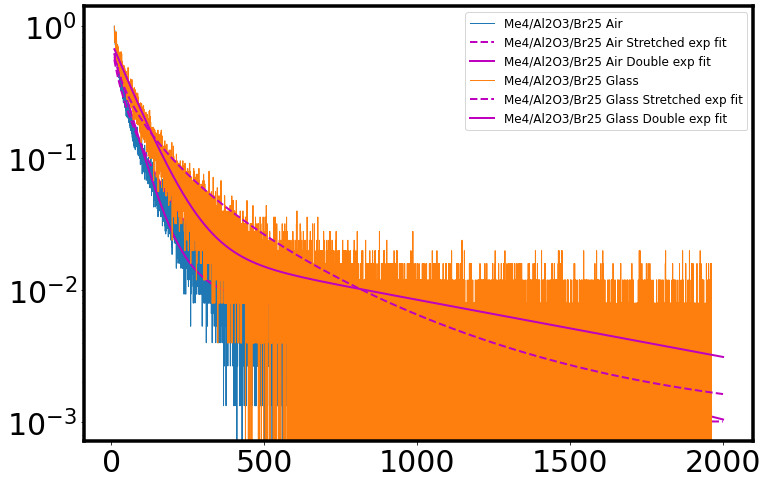

[4, 5]
10


In [40]:

numgroup = 5
groups = ([0,1],[2,3],[4,5],[6,7],[8,9])

for n in range(numgroup):
#     print(n)
    fig = plt.figure(figsize =(12, 8))
    for K in groups[n]:
#         print(K)
        plotter = K+1
        time = data.values[np.int32(peaktime[K]):np.int32(prange[K]),0]
        plt.plot(time, data.values[np.int32(peaktime[K]):np.int32(prange[K]),plotter]/np.max(data.values[:np.int32(prange[K]),plotter]), lw = 1,label = names1[K])
        plt.plot(time, strfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm--', lw = 2, label=names1[K] + " Stretched exp fit")
        plt.plot(time, dubfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm-', lw = 2, label=names1[K] + " Double exp fit")
    #     plt.plot(time, strfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm--', lw = 2, )
    #     plt.plot(time, dubfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm-', lw = 2, )    

        plt.yscale('log')
    plt.legend(fontsize = "large",)
    plt.show()


In [12]:
# xsize = 3
# ysize = 4
# fig, axs = plt.subplots(ysize,xsize,sharex=False, sharey=False,figsize = (18,12))

# for L in range(ysize):
#     for K in range(xsize):
#         plotter = K+1+xsize*L
#         time = data.values[np.int32(peaktime[K]):np.int32(prange[K]),0]
#         axs[L,K].plot(time, data.values[np.int32(peaktime[K]):np.int32(prange[K]),plotter]/np.max(data.values[:np.int32(prange[K]),plotter]), lw = 1,label = names1[K+3*L])
#         axs[L,K].plot(time, strfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm--', lw = 2, )
#         axs[L,K].plot(time, dubfits[np.int32(peaktime[K]):np.int32(prange[K]),plotter], 'm-', lw = 2, )
#         axs[L,K].legend(fontsize = "small",)

    
# plt.yscale('log')
# axs[2,1].set_xlabel("Time (ns)",fontsize = 30)
# axs[1,0].set_ylabel("Counts",fontsize = 30)


# plt.show()

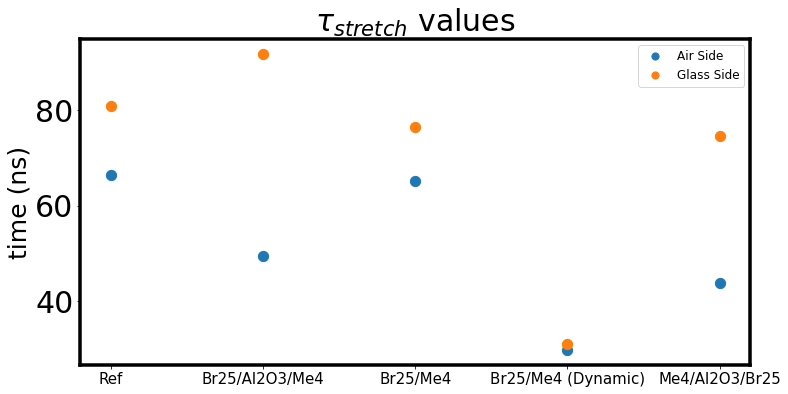

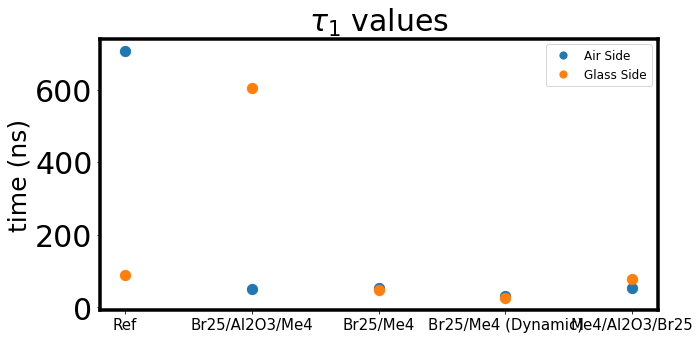

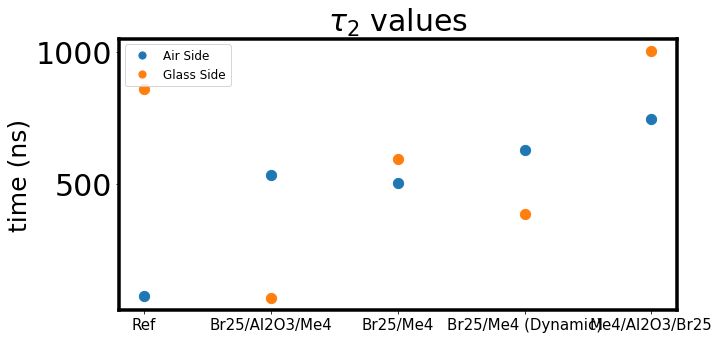

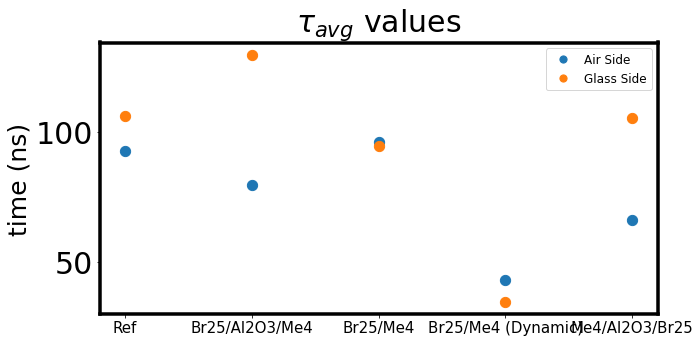

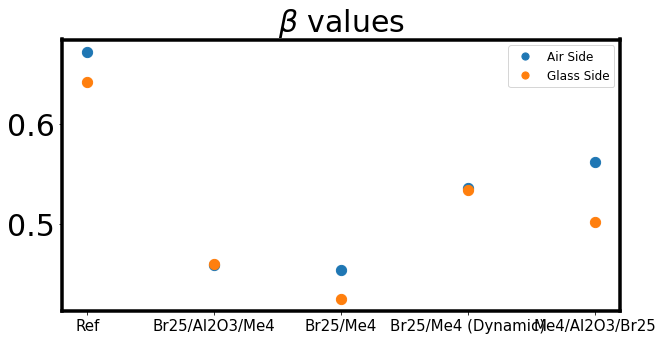

In [76]:
fig = plt.figure(figsize =(12, 6))
plt.plot(taus[0:10:2],'.', label = "Air Side" )
plt.plot(taus[1:10:2],'.', label = "Glass Side")
plt.title(r"$\tau_{stretch}$ values", fontsize = 30)
plt.ylabel("time (ns)", fontsize = 25)
plt.xticks(np.arange(5),xlabels, fontsize = xsize)

# plt.xlabel("Surface Passivator", fontsize = 25)
plt.legend(fontsize = "large", markerscale = 0.7)
plt.show()
print()
print()
print()


fig = plt.figure(figsize =(10, 5))
plt.plot(tau1[0:10:2],'.', label = "Air Side" )
plt.plot(tau1[1:10:2],'.', label = "Glass Side")
plt.title(r"$\tau_{1}$ values", fontsize = 30)
plt.ylabel("time (ns)", fontsize = 25)
# plt.xlabel("Surface Passivator", fontsize = 25)
plt.legend(fontsize = "large", markerscale = 0.7)
plt.xticks(np.arange(5),xlabels, fontsize = xsize)
plt.show()
print()
print()
print()


fig = plt.figure(figsize =(10, 5))
plt.plot(tau2[0:10:2],'.', label = "Air Side" )
plt.plot(tau2[1:10:2],'.', label = "Glass Side")
plt.title(r"$\tau_{2}$ values", fontsize = 30)
plt.ylabel("time (ns)", fontsize = 25)
# plt.xlabel("Surface Passivator", fontsize = 25)
plt.xticks(np.arange(5),xlabels, fontsize = xsize)
plt.legend(fontsize = "large", markerscale = 0.7)
plt.show()
print()
print()
print()


fig = plt.figure(figsize =(10, 5))
plt.plot(taua[0:10:2],'.', label = "Air Side" )
plt.plot(taua[1:10:2],'.', label = "Glass Side")
plt.title(r"$\tau_{avg}$ values", fontsize = 30)
plt.ylabel("time (ns)", fontsize = 25)
# plt.xlabel("Surface Passivator", fontsize = 25)
plt.xticks(np.arange(5),xlabels, fontsize = xsize)
plt.legend(fontsize = "large", markerscale = 0.7)
plt.show()
print()
print()
print()


fig = plt.figure(figsize =(10, 5))
plt.plot(beta[0:10:2],'.', label = "Air Side" )
plt.plot(beta[1:10:2],'.', label = "Glass Side")
plt.title(r"$\beta$ values", fontsize = 30)
# plt.ylabel("time (ns)", fontsize = 25)
# plt.xlabel("Surface Passivator", fontsize = 25)
plt.xticks(np.arange(5),xlabels, fontsize = xsize)
plt.legend(fontsize = "large", markerscale = 0.7)
plt.show()
print()
print()
print()